<a href="https://colab.research.google.com/github/MaryDoose/MaryDoose/blob/main/diabetes_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
file_path = '/content/drive/My Drive/diabetes_prediction_dataset.csv'

In [8]:
df=pd.read_csv(file_path)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [10]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [13]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [14]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [15]:
df.duplicated().sum()

3854

In [16]:
df.shape

(100000, 9)

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape

(96146, 9)

In [19]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146.000000,96146.000000,96146.000000,96146,96146.000000,96146.000000,96146.000000,96146.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,34398,NaN,NaN,NaN,NaN
mean,NaN,41.794326,0.077601,0.040803,NaN,27.321461,5.532609,138.218231,0.088220
std,NaN,22.462948,0.267544,0.197833,NaN,6.767716,1.073232,40.909771,0.283616
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7b1ee178e890>,
 'caps': [<matplotlib.lines.Line2D at 0x7b1ee178f340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b1ee178e500>],
 'medians': [<matplotlib.lines.Line2D at 0x7b1ee178e9e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b1ee178e5f0>],
 'means': []}

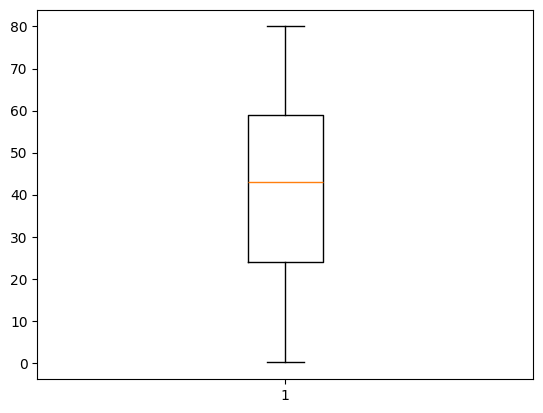

In [48]:
plt.boxplot(df['age'])

(array([ 8749.,  6960.,  9247.,  9883., 10205., 11233., 11714., 10499.,
         7736.,  9920.]),
 array([ 0.08 ,  8.072, 16.064, 24.056, 32.048, 40.04 , 48.032, 56.024,
        64.016, 72.008, 80.   ]),
 <BarContainer object of 10 artists>)

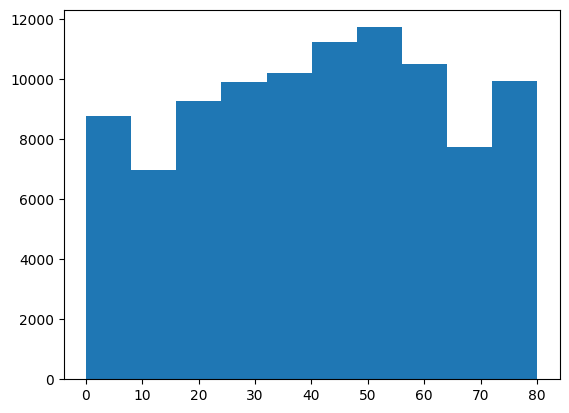

In [46]:
plt.hist(df['age'], bins=10)

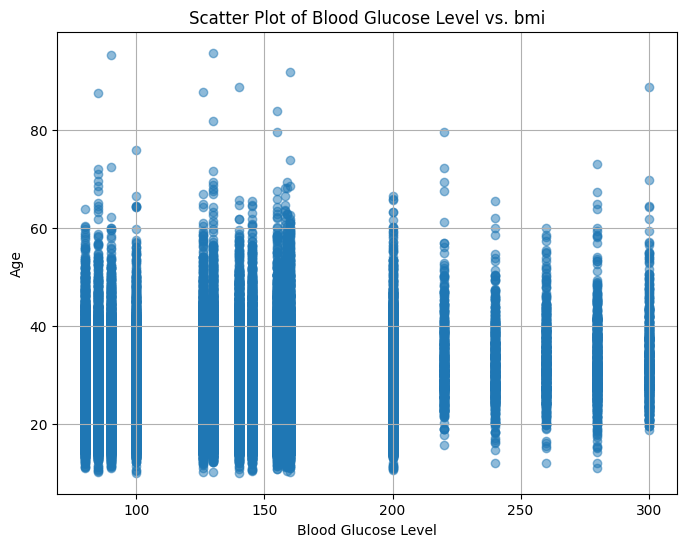

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(df['blood_glucose_level'], df['bmi'], alpha=0.5)
plt.xlabel("Blood Glucose Level")
plt.ylabel("Age")
plt.title("Scatter Plot of Blood Glucose Level vs. bmi")
plt.grid(True)
plt.show()

In [20]:
X = df.drop(columns= df.columns[-1])

In [21]:
y = df['diabetes']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
label_encoder = LabelEncoder()

In [26]:
X_train['gender'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender'] = label_encoder.transform(X_test['gender'])

In [27]:
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data_train=onehot_encoder.fit_transform(X_train[['smoking_history']])
encoded_data_test=onehot_encoder.transform(X_test[['smoking_history']])

In [28]:
encoded_feature_names=onehot_encoder.get_feature_names_out(['smoking_history'])

In [29]:
onehot_df_train = pd.DataFrame(encoded_data_train, columns=encoded_feature_names, index=X_train.index)
onehot_df_test = pd.DataFrame(encoded_data_test, columns=encoded_feature_names, index=X_test.index)

In [30]:
X_train=pd.concat([X_train.drop('smoking_history', axis=1), onehot_df_train],axis =1)
X_test=pd.concat([X_test.drop('smoking_history', axis=1), onehot_df_test],axis =1)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76916 entries, 46612 to 15910
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       76916 non-null  int64  
 1   age                          76916 non-null  float64
 2   hypertension                 76916 non-null  int64  
 3   heart_disease                76916 non-null  int64  
 4   bmi                          76916 non-null  float64
 5   HbA1c_level                  76916 non-null  float64
 6   blood_glucose_level          76916 non-null  int64  
 7   smoking_history_No Info      76916 non-null  float64
 8   smoking_history_current      76916 non-null  float64
 9   smoking_history_ever         76916 non-null  float64
 10  smoking_history_former       76916 non-null  float64
 11  smoking_history_never        76916 non-null  float64
 12  smoking_history_not current  76916 non-null  float64
dtypes: float64(9), in

In [32]:
X_train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
46612,0,35.0,0,0,31.53,6.6,155,1.0,0.0,0.0,0.0,0.0,0.0
31612,0,0.4,0,0,15.19,4.0,130,1.0,0.0,0.0,0.0,0.0,0.0
96143,0,60.0,0,0,20.90,6.5,100,0.0,0.0,1.0,0.0,0.0,0.0
95691,1,66.0,0,0,27.05,6.0,130,0.0,0.0,0.0,0.0,1.0,0.0
37658,1,48.0,0,0,24.05,4.8,145,0.0,0.0,0.0,0.0,0.0,1.0


LogisticRegression(max_iter=1000)

In [34]:
y_Ir_test_pred=Ir.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm = confusion_matrix(y_test, y_Ir_test_pred)

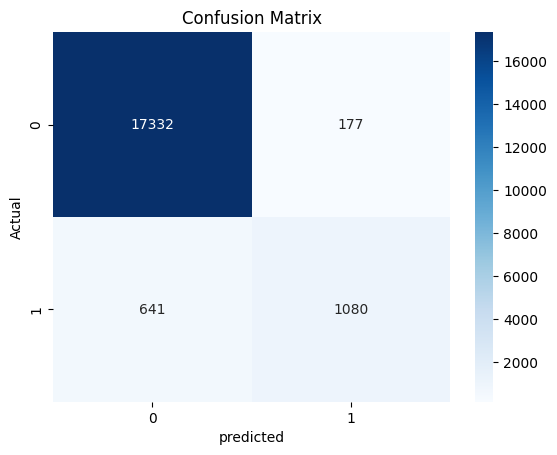

In [37]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_Ir_test_pred)
print (report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17509
           1       0.86      0.63      0.73      1721

    accuracy                           0.96     19230
   macro avg       0.91      0.81      0.85     19230
weighted avg       0.95      0.96      0.95     19230



In [39]:
import joblib
model='Diabetes_prediction_model'

In [40]:
joblib.dump(model, 'Diabetes_prediction_model.pkl')

['Diabetes_prediction_model.pkl']